In [29]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

# all GENIE CC interactions
Oct 23, 2017

In [30]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/GENIECCInteractions/'

# µp-events: general features
### To this end, we collect all CC events in which at least one proton was produced together with the muon

In [104]:
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/prodgenie_bnb_nu_uboone_overlay_mcc8_reco2_genie.csv')
print len(GENIEall),'CC interactions pairs in GENIE'

77 CC interactions pairs in GENIE


In [107]:
mupGENIEtypes = ['Is1mu1p'        , 'IsCC1p0pi'      ,'IsVertexContained'             ,'Is_mu_TrackReconstructed' ,'Is_p_TrackReconstructed','IsVertexReconstructed' , 'IsCCQE']
mupGENIElabels= [r'$\mu p$'       ,r'$CC1{p}0_{\pi}$', '$\\nu$-int. in active volume','$\\mu$ reconstructed'     ,'$p$ reconstructed'      ,'$\\mu,p$ reconstructed', 'CCQE']
mupGENIEcolors= ['forestgreen'    ,'blue'           , 'red'                         , 'green'                   , 'black'                 , 'purple'               , 'orange']
mupGENIEsamples=[]

In [109]:
print
mupGENIE=dict()
for pair_type,label in zip(mupGENIEtypes,mupGENIElabels):
    mupGENIE[pair_type] = GENIEall[GENIEall[pair_type]==True]
    mupGENIEsamples.append(mupGENIE[pair_type])
    Ntype = len(mupGENIE[pair_type])
    print Ntype,'are '+label+', %.1f'%(100.*float(Ntype)/len(GENIEall))+'%'


4 are $\mu p$, 5.2%
22 are $CC1{p}0_{\pi}$, 28.6%
77 are $\nu$-int. in active volume, 100.0%
35 are $\mu$ reconstructed, 45.5%
13 are $p$ reconstructed, 16.9%
9 are $\mu,p$ reconstructed, 11.7%
35 are CCQE, 45.5%


9
88.8888888889 %


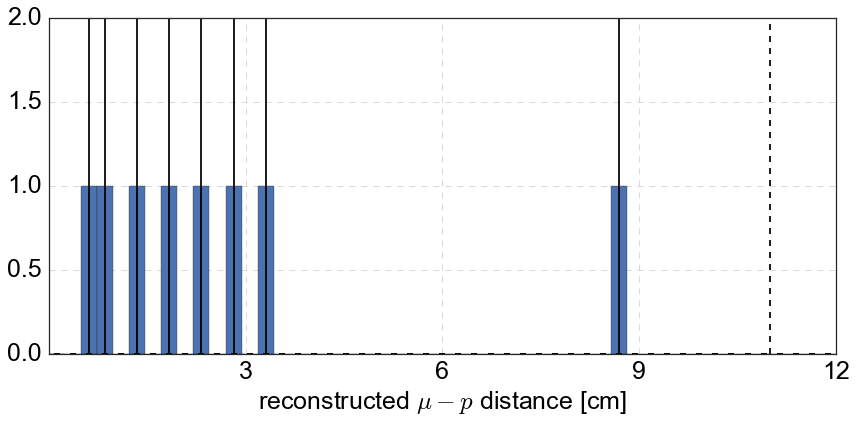

In [110]:
# fig:mup_distance
# x = mupGENIE['IsCC_1p_200MeVc']['distance']
mupEvents = GENIEall[GENIEall['IsVertexReconstructed']==True]
print len(mupEvents)
x = mupEvents['reconstructed mu-p distance']
# print x
fig,ax=plt.subplots(figsize=(12,6))
h,bins,_=ax.hist(x,bins=np.linspace(0,12,50)) ; mid = bins[1:] - 0.5*(bins[1]-bins[0])
plt.errorbar(mid,h,yerr=np.sqrt(h),fmt='o',markersize=1, color='red' , ecolor='black', capthick=2)
set_axes(ax,'reconstructed $\\mu-p$ distance [cm]' , '', fontsize=25 ,xticks=[3,6,9,12])
ax.grid(linestyle='--',alpha=0.75)
plt.plot([11,11],ax.get_ylim(),'--',color='black')
plt.tight_layout()
plt.savefig(figures_path+'mup_distance.pdf')
# how many of the µp pairs are retained for a cut < 11 cm?
print 100.*float(len(mupEvents[mupEvents['reconstructed mu-p distance']<11]))/len(mupEvents),'%'

In [111]:
Ncontained = len(mupGENIE['IsInActiveVolume'])
for pair_type,label in zip(['IsInActiveVolume','Is_mu_TrackReconstructed' ,'IsVertexReconstructed' ],
                           ['CC$N_{p}$ vertex  with $N_{p}>0$ contained in (active volume of) the detector'
                            ,'\muon\ track reconstructed and contained in FV'
                            ,'\muon\ and at least one p tracks reconstructed and contained in FV']):
    Ntype = len(mupGENIE[pair_type])
    print Ntype,'are '+label+', %.1f'%(100.*float(Ntype)/Ncontained)+'%'

KeyError: 'IsInActiveVolume'

## un-reconstructed events

In [ ]:
## ~50% of the µp interactions are contained in the detector
### in ~70% out of which, the µ was reconstructed (not necessarily contained)
### however only in ~ 35% of which, the proton tracks are reconstructed - where are all the unreconstructed protons?

In [112]:
def plot_proton_reco_unreco(var='truth_Pp_theta',xlabel='truth $\\theta_{p}$ [deg.]',mul=1,bins=np.linspace(0,180,45),xticks=np.linspace(0,180,7)):
    fig,ax=plt.subplots(figsize=(12,6))
    for gtype,label,color in zip(['Is_mu_TrackReconstructed','Is_p_TrackReconstructed']#,'pUnreconstructed']
                             ,['all protons','proton reconstructed']#,'proton not-reconstructed']
                             ,['black','royalblue','salmon']):
        x = mul*mupGENIE[gtype][var]
        h , edges = np.histogram(x,bins=bins); mid = 0.5*(bins[1:] + bins[:-1]) 
        y = h.astype(float)# /len(x)
        yerr=1./np.sqrt(h)#/len(x)
        ax.errorbar( mid, y, yerr=yerr, xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
    
    set_axes(ax,xlabel , 'counts', fontsize=25,xticks=xticks)
    ax.legend(loc='upper right',fontsize=25,markerscale=2.)
    ax.grid(linestyle='--',alpha=0.5)
    plt.tight_layout()
    plt.savefig(figures_path+'ProtonRecoUnreco_'+var+'.pdf')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in divide


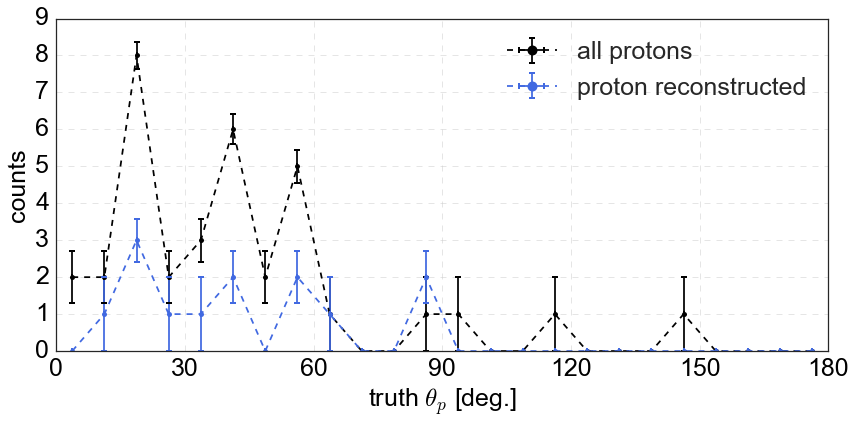

In [113]:
plot_proton_reco_unreco(var='truth_Pp_theta',xlabel='truth $\\theta_{p}$ [deg.]'
                        ,mul=180./np.pi,bins=np.linspace(0,180,25),xticks=np.linspace(0,180,7))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in divide


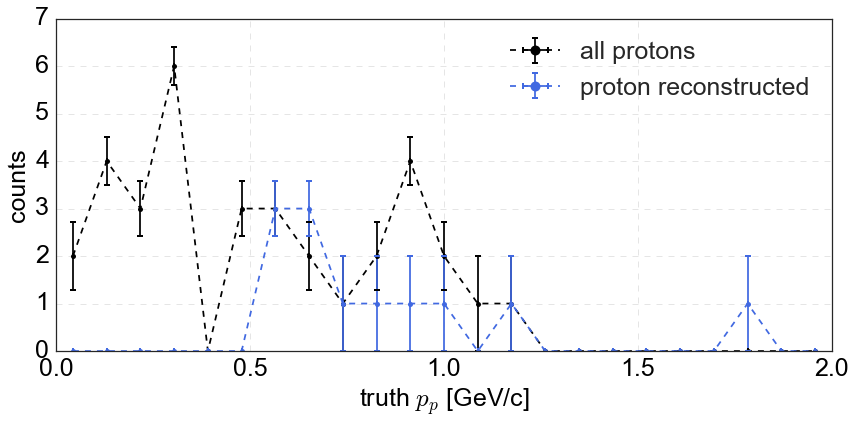

In [114]:
plot_proton_reco_unreco(var='truth_Pp',xlabel='truth $p_{p}$ [GeV/c]',bins=np.linspace(0,2,24),xticks=np.linspace(0,2,5))

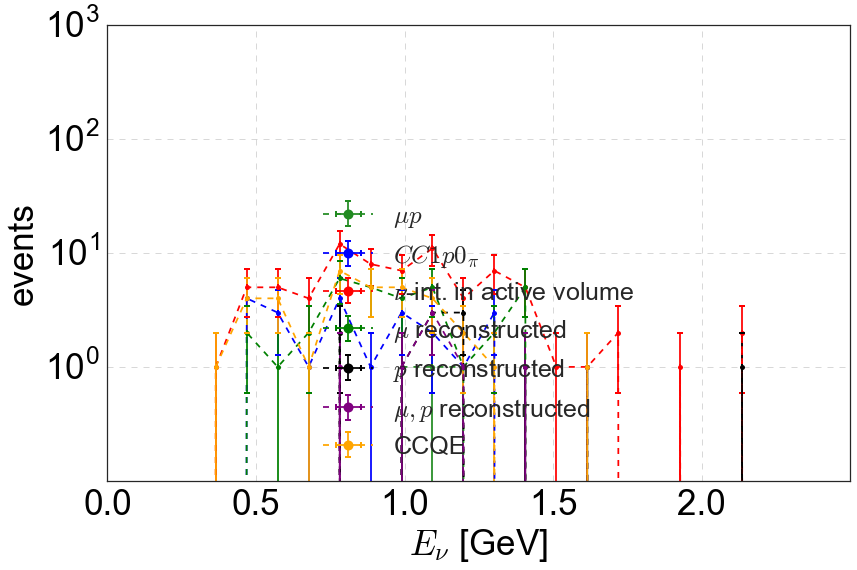

In [115]:
# fig:mupEv
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,2.5,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(sample['truth_Ev'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower center',fontsize=25,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label='$E_{\\nu}$ [GeV]',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(0,2,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'mupEv.pdf')

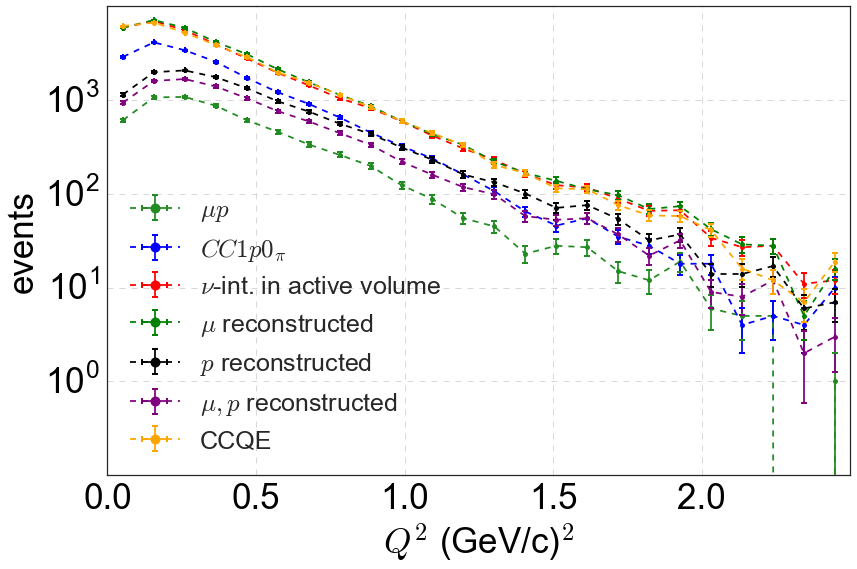

In [99]:
# fig:mupQ2
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,2.5,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(sample['truth_Q2'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower left',fontsize=25,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label='$Q^{2}$ (GeV/c)$^2$',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(0,2,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'mupQ2.pdf')

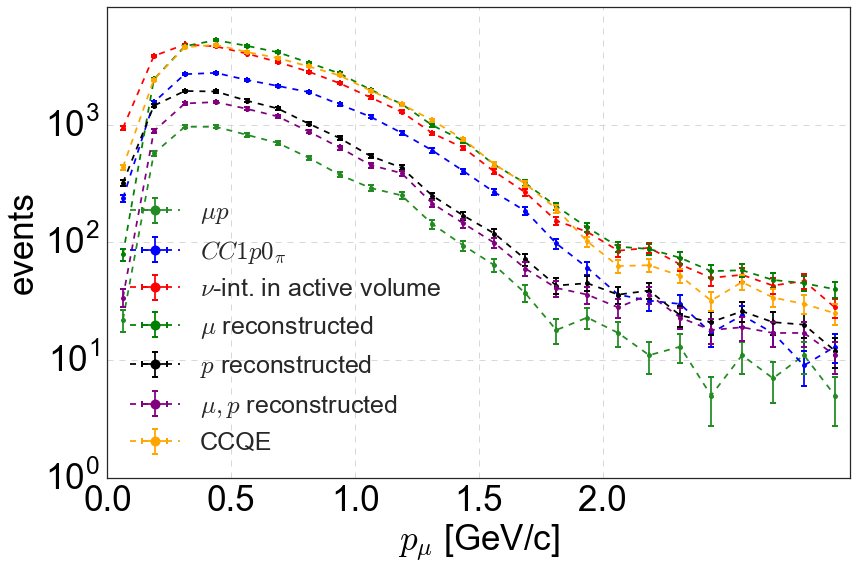

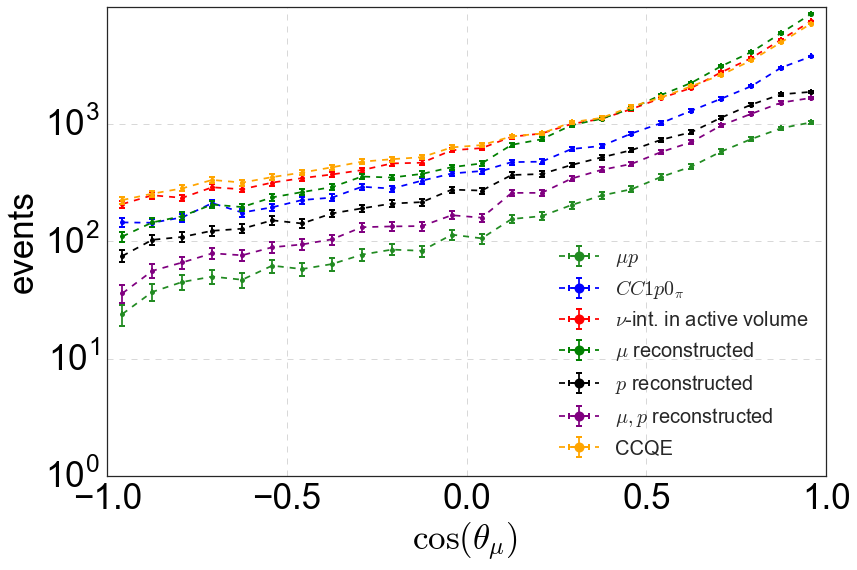

In [100]:
# fig:true_mup_truth_Pmu_momentum
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,3.,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(sample['truth_Pmu'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower left',fontsize=25,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label=r'$p_{\mu}$ [GeV/c]',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(0,2,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'true_mup_truth_Pmu_momentum.pdf')

# fig:true_mup_cos_truth_Pmu_theta
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(-1,1,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(np.cos(sample['truth_Pmu_theta']),bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower right',fontsize=20,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label='$\\cos(\\theta_{\\mu})$ ',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(-1,1,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'true_mup_cos_truth_Pmu_theta.pdf')

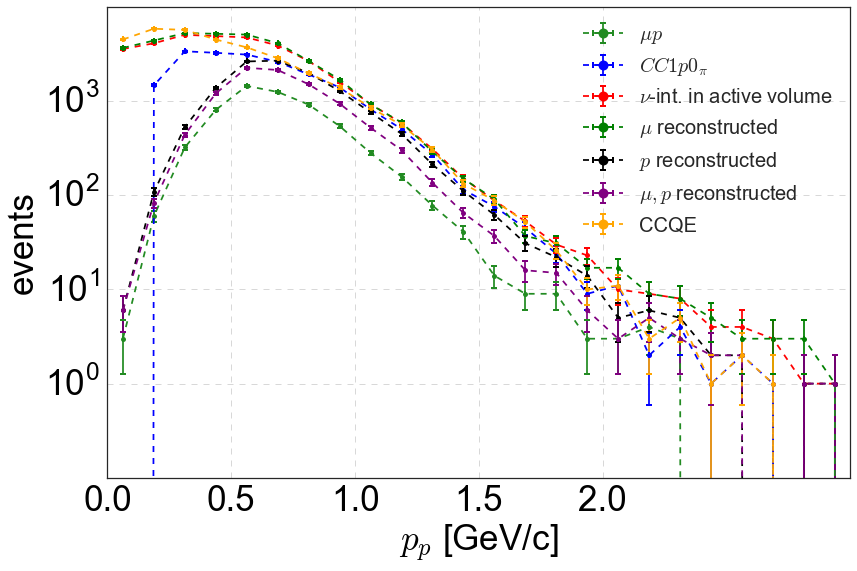

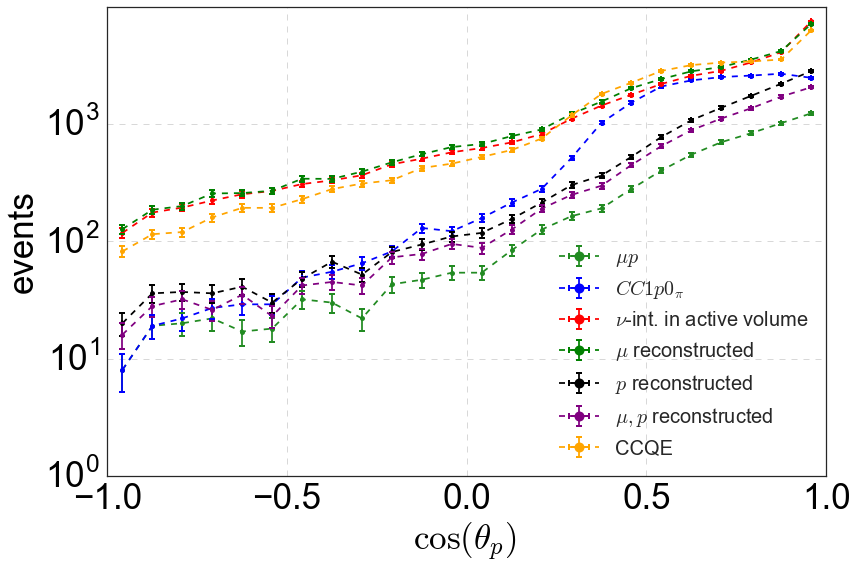

In [101]:
# fig:true_mup_truth_Pmu_momentum
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,3.,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(sample['truth_Pp'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='upper right',fontsize=20,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label='$p_{p}$ [GeV/c]',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(0,2,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'true_mup_truth_Pp_momentum.pdf')

# fig:true_mup_cos_truth_Pp_theta
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(-1,1,25)
for sample,label,color in zip(mupGENIEsamples,mupGENIElabels,mupGENIEcolors):
    h,bins,_=plt.hist(np.cos(sample['truth_Pp_theta']),bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower right',fontsize=20,markerscale=2.)
ax.grid(linestyle='--',alpha=0.75)
set_axes(ax,x_label='$\\cos(\\theta_{p})$ ',y_label='events',fontsize=35)
ax.xaxis.set_ticks(np.linspace(-1,1,5))
ax.set_yscale('log'); ax.yaxis.set_ticks([1,10,100,1000])
plt.tight_layout()
plt.savefig(figures_path+'true_mup_cos_truth_Pp_theta.pdf')

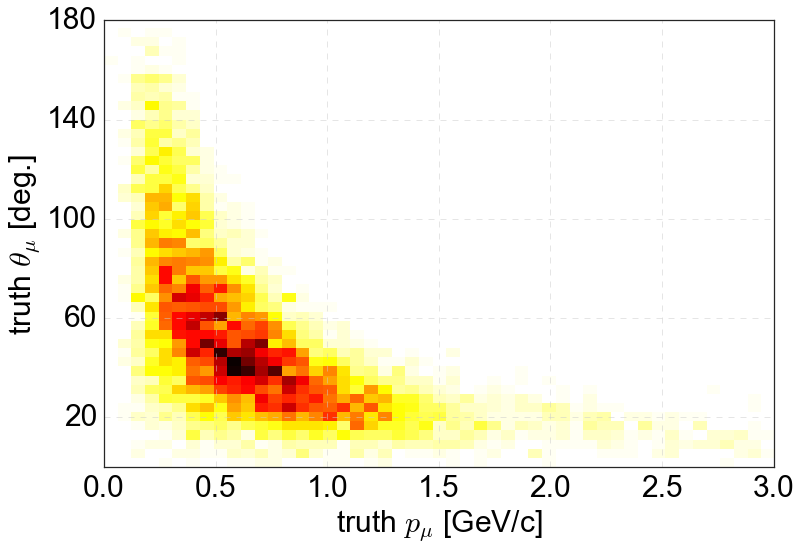

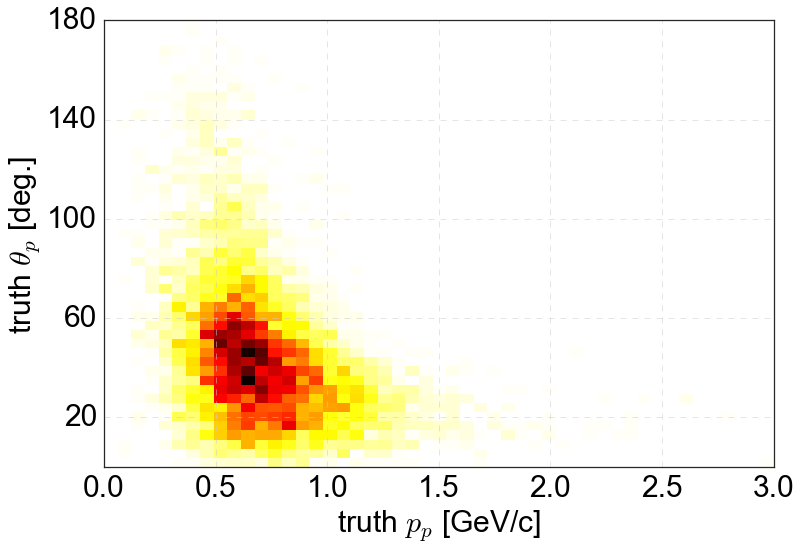

In [103]:
# fig:truth_Pmu_theta_mu
fig,ax = plt.subplots(figsize=(12,8))
bins = (np.linspace(0,3,50),np.linspace(0,180,50))
sample=mupGENIE['IsVertexReconstructed']
plot_2d_hist(sample['truth_Pmu'],180./np.pi*sample['truth_Pmu_theta']
             ,bins=bins,ax=ax)
ax.grid(linestyle='--',alpha=0.5)
set_axes(ax,x_label='truth $p_{\\mu}$ [GeV/c]',y_label='truth $\\theta_{\\mu}$ [deg.]'
         ,yticks=[20,60,100,140,180]
         ,fontsize=30)
plt.savefig(figures_path+'truth_Pmu_theta_mu.pdf')

# fig:truth_Pmu_theta_p
fig,ax = plt.subplots(figsize=(12,8))
bins = (np.linspace(0,3,50),np.linspace(0,180,50))
sample=mupGENIE['IsVertexReconstructed']
plot_2d_hist(sample['truth_Pp'],180./np.pi*sample['truth_Pp_theta']
             ,bins=bins,ax=ax)
ax.grid(linestyle='--',alpha=0.5)
set_axes(ax,x_label='truth $p_{p}$ [GeV/c]',y_label='truth $\\theta_{p}$ [deg.]'
         ,yticks=[20,60,100,140,180]
         ,fontsize=30)
plt.savefig(figures_path+'truth_Pmu_theta_p.pdf')